In [1]:
import numpy
from matplotlib import pyplot
import py_monte_carlo

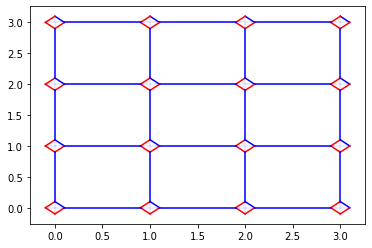

In [2]:
def make_lattice(xsidelen=2, ysidelen=2):
    x = numpy.arange(xsidelen)
    y = numpy.arange(ysidelen)
    n = numpy.arange(4)
    X, Y, N = numpy.meshgrid(x, y, n)

    INDX = Y*len(x)*len(n) + X*len(n) + N
    SQR_BONDS = Y*len(x)*len(n) + X*len(n) + (N + 1)%len(n)

    edges = [((a, b), -1 if a%len(n) == 0 and b%len(n) == 1 else 1) 
             for a,b in zip(INDX.flatten(), SQR_BONDS.flatten())]
    
    for (sx, sy, sn) in zip(X.flatten(), Y.flatten(), N.flatten()):
        if sn == 1:
            a = sy*len(x)*len(n) + sx*len(n) + 1
            b = sy*len(x)*len(n) + ((sx+1)%len(x))*len(n) + 3
            edges.append(((a,b), -1))
        if sn == 0:
            a = sy*len(x)*len(n) + sx*len(n) + 0
            b = ((sy+1)%len(y))*len(x)*len(n) + sx*len(n) + 2
            edges.append(((a,b), -1))
    
    return edges


def get_cart(a, xsidelen=2, ysidelen=2, inner_size=0.1):
    y = a//(xsidelen*4)
    x = (a//4)%ysidelen
    rel = a % 4
    if rel == 0:
        return (x, y+inner_size)
    if rel == 1:
        return (x+inner_size, y)
    if rel == 2:
        return (x, y-inner_size)
    if rel == 3:
        return (x-inner_size, y)
    
edges = make_lattice(4, 4)
for (a, b), j in edges:
    ax, ay = get_cart(a, 4, 4)
    bx, by = get_cart(b, 4, 4)
    
    if abs(ax - bx) >= 1.0 or abs(ay - by) >= 1.0:
        alpha = 0.1
    else:
        alpha = 1.0
    
    if j > 0:
        pyplot.plot([ax, bx], [ay, by], '-', c='r', alpha=alpha)
    if j < 0:
        pyplot.plot([ax, bx], [ay, by], '-', c='b', alpha=alpha)
        
pyplot.show()

In [38]:
gammas = 10**numpy.linspace(-3,0,10)
beta = 5.0

no_rvb_corrs = []
rvb_corrs = []

for gamma in gammas:
    print("Gamma: {:.3f}".format(gamma))
    graph = py_monte_carlo.Lattice(edges)
    graph.set_transverse_field(gamma)
    graph.set_enable_rvb_update(True)
    graph.set_enable_heatbath_update(True)
    correlation = graph.run_quantum_monte_carlo_and_measure_bond_autocorrelation(beta, 10000, 32)
    rvb_corrs.append(correlation)
    
    graph = py_monte_carlo.Lattice(edges)
    graph.set_transverse_field(gamma)
    graph.set_enable_rvb_update(False)
    graph.set_enable_heatbath_update(True)
    correlation = graph.run_quantum_monte_carlo_and_measure_bond_autocorrelation(beta, 10000, 32)
    no_rvb_corrs.append(correlation)
rvb_corrs = numpy.asarray(rvb_corrs)
no_rvb_corrs = numpy.asarray(no_rvb_corrs)

Gamma: 0.001
Gamma: 0.002
Gamma: 0.005
Gamma: 0.010
Gamma: 0.022
Gamma: 0.046
Gamma: 0.100
Gamma: 0.215
Gamma: 0.464
Gamma: 1.000


/tmp/ipykernel_10732/2803619555.py:8: RuntimeWarning: Mean of empty slice
  pyplot.plot(numpy.nanmean(no_rvb_corrs[i,:,:rvb_corrs.shape[2]//2],axis=0), c='b', label='Cluster')


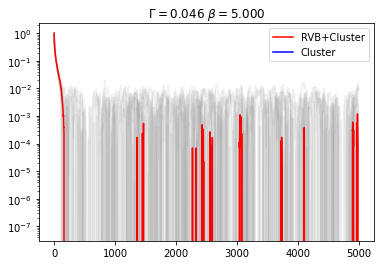

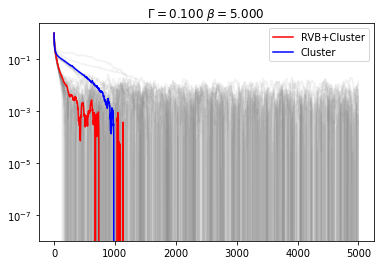

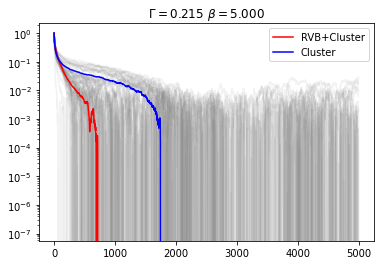

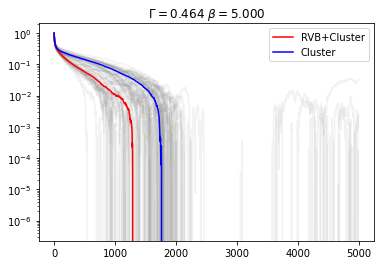

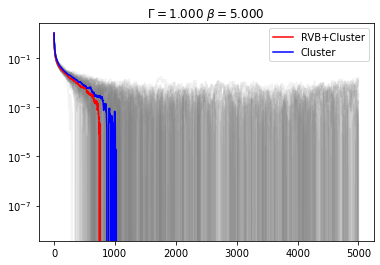

In [42]:
for i in range(rvb_corrs.shape[0]):
    if numpy.isnan(rvb_corrs[i]).mean() == 1.0 and numpy.isnan(no_rvb_corrs[i]).mean() == 1.0:
        continue
    for j in range(rvb_corrs.shape[1]):
        pyplot.plot(rvb_corrs[i,j,:rvb_corrs.shape[2]//2], c='grey', alpha=0.1)
        pyplot.plot(no_rvb_corrs[i,j,:no_rvb_corrs.shape[2]//2], c='grey', alpha=0.1)
    pyplot.plot(numpy.nanmean(rvb_corrs[i,:,:rvb_corrs.shape[2]//2],axis=0), c='r', label='RVB+Cluster')
    pyplot.plot(numpy.nanmean(no_rvb_corrs[i,:,:rvb_corrs.shape[2]//2],axis=0), c='b', label='Cluster')
    pyplot.yscale('log')
    pyplot.title(r'$\Gamma = {:.3f} ~ \beta = {:.3f}$'.format(gammas[i], beta))
    pyplot.legend()
    pyplot.show()

In [43]:
gammas = 10**numpy.linspace(-3,0,10)
beta = 10.0

no_rvb_corrs = []
rvb_corrs = []

for gamma in gammas:
    print("Gamma: {:.3f}".format(gamma))
    graph = py_monte_carlo.Lattice(edges)
    graph.set_transverse_field(gamma)
    graph.set_enable_rvb_update(True)
    graph.set_enable_heatbath_update(True)
    correlation = graph.run_quantum_monte_carlo_and_measure_bond_autocorrelation(beta, 10000, 32)
    rvb_corrs.append(correlation)
    
    graph = py_monte_carlo.Lattice(edges)
    graph.set_transverse_field(gamma)
    graph.set_enable_rvb_update(False)
    graph.set_enable_heatbath_update(True)
    correlation = graph.run_quantum_monte_carlo_and_measure_bond_autocorrelation(beta, 10000, 32)
    no_rvb_corrs.append(correlation)
rvb_corrs = numpy.asarray(rvb_corrs)
no_rvb_corrs = numpy.asarray(no_rvb_corrs)

Gamma: 0.001
Gamma: 0.002
Gamma: 0.005
Gamma: 0.010
Gamma: 0.022
Gamma: 0.046
Gamma: 0.100
Gamma: 0.215
Gamma: 0.464
Gamma: 1.000


/tmp/ipykernel_10732/2803619555.py:8: RuntimeWarning: Mean of empty slice
  pyplot.plot(numpy.nanmean(no_rvb_corrs[i,:,:rvb_corrs.shape[2]//2],axis=0), c='b', label='Cluster')


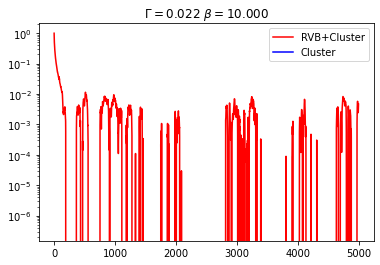

/tmp/ipykernel_10732/2803619555.py:8: RuntimeWarning: Mean of empty slice
  pyplot.plot(numpy.nanmean(no_rvb_corrs[i,:,:rvb_corrs.shape[2]//2],axis=0), c='b', label='Cluster')


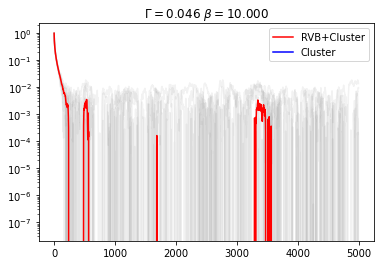

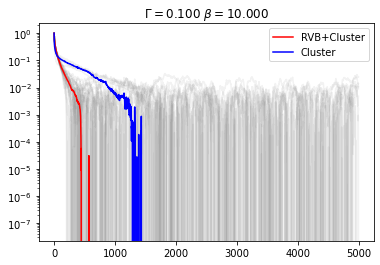

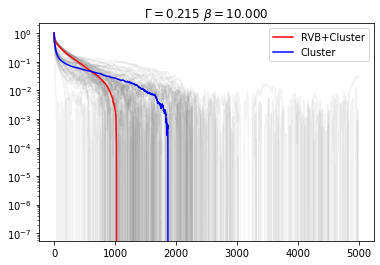

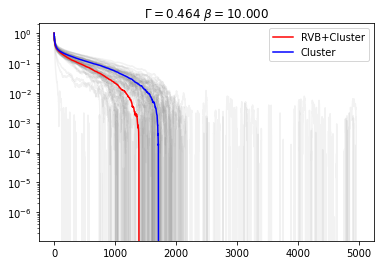

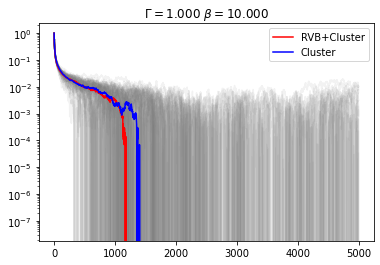

In [44]:
for i in range(rvb_corrs.shape[0]):
    if numpy.isnan(rvb_corrs[i]).mean() == 1.0 and numpy.isnan(no_rvb_corrs[i]).mean() == 1.0:
        continue
    for j in range(rvb_corrs.shape[1]):
        pyplot.plot(rvb_corrs[i,j,:rvb_corrs.shape[2]//2], c='grey', alpha=0.1)
        pyplot.plot(no_rvb_corrs[i,j,:no_rvb_corrs.shape[2]//2], c='grey', alpha=0.1)
    pyplot.plot(numpy.nanmean(rvb_corrs[i,:,:rvb_corrs.shape[2]//2],axis=0), c='r', label='RVB+Cluster')
    pyplot.plot(numpy.nanmean(no_rvb_corrs[i,:,:rvb_corrs.shape[2]//2],axis=0), c='b', label='Cluster')
    pyplot.yscale('log')
    pyplot.title(r'$\Gamma = {:.3f} ~ \beta = {:.3f}$'.format(gammas[i], beta))
    pyplot.legend()
    pyplot.show()